In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('C:/Users/KimDongyoung/Desktop/git_LGaimers5/Lg_aimers5/data/trim_train_data.csv')

### Machine Tact time 변수

In [3]:
# dam, fill1, fill2 tact time을 전부 더한 변수 생성

train_data['Total_Machine_Tact_Time'] = (
    train_data['Machine Tact time Collect Result_Dam'] +
    train_data['Machine Tact time Collect Result_Fill1'] +
    train_data['Machine Tact time Collect Result_Fill2']
)

In [4]:
train_data[['Machine Tact time Collect Result_Dam', 
      'Machine Tact time Collect Result_Fill1', 
      'Machine Tact time Collect Result_Fill2', 
      'Total_Machine_Tact_Time']].head()

,Machine Tact time Collect Result_Dam,Machine Tact time Collect Result_Fill1,Machine Tact time Collect Result_Fill2,Total_Machine_Tact_Time
0,58.5,55.7,19.9,134.1
1,65.1,56.5,19.6,141.2
2,76.9,58.7,19.8,155.4
3,70.5,57.7,19.9,148.1
4,88.3,89.9,19.7,197.9


In [5]:
train_data['Total_Machine_Tact_Time'].value_counts()

Total_Machine_Tact_Time
135.5    449
135.6    402
135.4    339
135.9    312
135.8    277
        ... 
151.0      1
169.2      1
190.6      1
170.5      1
267.0      1
Name: count, Length: 1543, dtype: int64

In [6]:
def value_counts_ratio_count(df, col_name, target_name):
    """
    주어진 데이터프레임의 특정 열에 대해 각 값마다 타겟 변수의 비율과 갯수, 총 갯수를 출력하는 함수.

    Parameters:
    df (pd.DataFrame): 데이터프레임
    col_name (str): 열 이름
    target_name (str): 타겟 변수 이름
    """
    # 각 값마다 타겟 변수의 비율 계산
    value_counts = df.groupby(col_name)[target_name].value_counts(normalize=True).unstack().fillna(0)
    
    # 각 값마다 타겟 변수의 갯수 계산
    counts = df.groupby(col_name)[target_name].value_counts().unstack().fillna(0)
    
    # 각 값마다 총 갯수 계산
    total_counts = df[col_name].value_counts().rename('Total_Count')
    
    # 비율과 갯수를 합침
    result = value_counts.join(counts, lsuffix='_ratio', rsuffix='_count')
    
    # 총 갯수를 합침
    result = result.join(total_counts, on=col_name)
    
    # 출력 형식 조정
    result.index.name = 'variable'
    print(f"\n{col_name}별 {target_name} 비율 및 갯수\n")
    print(result.rename(columns=lambda x: x.split('_')[0]))

In [7]:
value_counts_ratio_count(train_data, 'Total_Machine_Tact_Time', 'target')


Total_Machine_Tact_Time별 target 비율 및 갯수

          AbNormal  Normal  AbNormal  Normal  Total
variable                                           
77.1           1.0     0.0       1.0     0.0      1
103.3          0.0     1.0       0.0     1.0      1
104.7          0.0     1.0       0.0     1.0      1
105.5          0.0     1.0       0.0     1.0      1
107.5          0.0     1.0       0.0     1.0      1
...            ...     ...       ...     ...    ...
393.8          0.0     1.0       0.0     1.0      1
410.1          0.0     1.0       0.0     1.0      1
432.6          0.0     1.0       0.0     1.0      1
625.5          0.0     1.0       0.0     1.0      1
1102.7         1.0     0.0       1.0     0.0      1

[1543 rows x 5 columns]


### target과 total machine Tact time 간의 관계

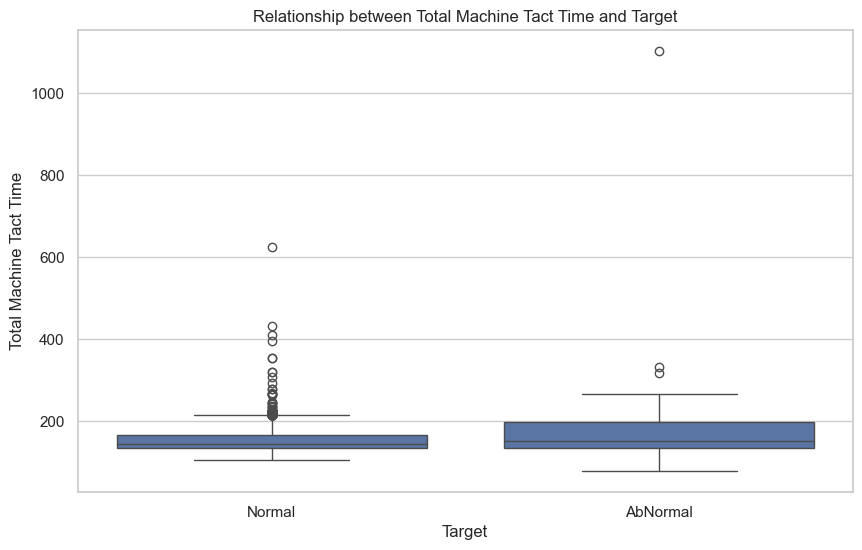

In [9]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a boxplot to show the distribution of Total_Machine_Tact_Time for each target category
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='Total_Machine_Tact_Time', data=train_data)
plt.title('Relationship between Total Machine Tact Time and Target')
plt.xlabel('Target')
plt.ylabel('Total Machine Tact Time')
plt.show()

 Q1, Q3

In [12]:
# Calculate the Q1 (25th percentile) and Q3 (75th percentile) for the "Normal" target group
normal_q1 = train_data[train_data['target'] == 'Normal']['Total_Machine_Tact_Time'].quantile(0.25)
normal_q3 = train_data[train_data['target'] == 'Normal']['Total_Machine_Tact_Time'].quantile(0.75)

# Calculate the Q1 (25th percentile) and Q3 (75th percentile) for the "abnormal" target group
abnormal_q1 = train_data[train_data['target'] != 'Normal']['Total_Machine_Tact_Time'].quantile(0.25)
abnormal_q3 = train_data[train_data['target'] != 'Normal']['Total_Machine_Tact_Time'].quantile(0.75)

print({'normal_Q1':normal_q1, 'normal_Q3':normal_q3, 'abnormal_Q1':abnormal_q1, 'abnormal_Q3':abnormal_q3})

{'normal_Q1': 133.2, 'normal_Q3': 165.9, 'abnormal_Q1': 134.3, 'abnormal_Q3': 198.3}


Outlier

In [18]:
# Calculate the IQR (Interquartile Range) for the "Normal" target group
q1 = train_data[train_data['target'] == 'Normal']['Total_Machine_Tact_Time'].quantile(0.25)
q3 = train_data[train_data['target'] == 'Normal']['Total_Machine_Tact_Time'].quantile(0.75)
iqr = q3 - q1

# Calculate the starting point for outliers (Q3 + 1.5*IQR)
outlier1 = q3 + 1.5 * iqr
outlier1

214.95000000000005

In [19]:
# Calculate the IQR (Interquartile Range) for the "Normal" target group
q1 = train_data[train_data['target'] == 'Normal']['Total_Machine_Tact_Time'].quantile(0.25)
q3 = train_data[train_data['target'] == 'Normal']['Total_Machine_Tact_Time'].quantile(0.75)
iqr = q3 - q1

# Calculate the starting point for outliers (Q1 - 1.5*IQR)
outlier2 = q1 - 1.5 * iqr
outlier2

84.14999999999996

In [20]:
# Calculate the IQR (Interquartile Range) for the "Abnormal" target group
q1 = train_data[train_data['target'] == 'AbNormal']['Total_Machine_Tact_Time'].quantile(0.25)
q3 = train_data[train_data['target'] == 'AbNormal']['Total_Machine_Tact_Time'].quantile(0.75)
iqr = q3 - q1

# Calculate the starting point for outliers (Q3 + 1.5*IQR)
outlier3 = q3 + 1.5 * iqr
outlier3

294.3

In [21]:
# Calculate the IQR (Interquartile Range) for the "Abnormal" target group
q1 = train_data[train_data['target'] == 'AbNormal']['Total_Machine_Tact_Time'].quantile(0.25)
q3 = train_data[train_data['target'] == 'AbNormal']['Total_Machine_Tact_Time'].quantile(0.75)
iqr = q3 - q1

# Calculate the starting point for outliers (Q1 - 1.5*IQR)
outlier4 = q1 - 1.5 * iqr
outlier4

38.30000000000001

outlier, Q1, Q3 값을 기준으로 구간 설정 후 normal, abnormal 개수 및 구성 비율 확인

In [24]:
# Define the bins and labels
bins = [38.3, 84.15, 133.2, 134.3, 165.9, 198.3, 214.95, 294.3]
labels = [f'Section {i+1}' for i in range(len(bins)-1)]

# Cut the Total_Machine_Tact_Time into the defined bins
train_data['Tact_Time_Section'] = pd.cut(train_data['Total_Machine_Tact_Time'], bins=bins, labels=labels, right=False)

# Calculate the count and composition ratio of normal and abnormal in each section
composition = train_data.groupby(['Tact_Time_Section', 'target']).size().unstack(fill_value=0)

# Calculate the composition ratio
composition_ratio = composition.div(composition.sum(axis=1), axis=0) * 100

# Combine counts and ratios into a single dataframe for clarity
result = pd.concat([composition, composition_ratio.add_suffix(' (%)')], axis=1)
result

C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_11428\2709703522.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  composition = train_data.groupby(['Tact_Time_Section', 'target']).size().unstack(fill_value=0)


target,AbNormal,Normal,AbNormal (%),Normal (%)
Tact_Time_Section,,,,
Section 1,1,0,100.000000,0.000000
Section 2,476,9382,4.828566,95.171434
Section 3,107,1915,5.291790,94.708210
Section 4,924,17319,5.064956,94.935044
Section 5,254,3706,6.414141,93.585859
Section 6,568,5617,9.183508,90.816492
Section 7,17,208,7.555556,92.444444


section 5,6,7에서 abnormal 비율이 9% 정도로 전체 평균 불량 비율보다 높았다. 이 구간은 165.9 보다 큰 경우이다.